## Build a Random Forest classifier on any readily available disease dataset to predict the correct disease. 


### Compare the performance of the classifier with decision tree.


In [7]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

In [8]:
# Load dataset
data = pd.read_csv("pima.csv")

In [9]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
303,5,115,98,0,0,52.9,0.209,28,1
385,1,119,54,13,50,22.3,0.205,24,0
375,12,140,82,43,325,39.2,0.528,58,1
6,3,78,50,32,88,31.0,0.248,26,1
126,3,120,70,30,135,42.9,0.452,30,0


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# split data into input and taget variable(s)

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [12]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20)

In [13]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [16]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


In [17]:
# check Important features
feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": classifier.feature_importances_}).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,Glucose,0.249268
5,BMI,0.164337
7,Age,0.149366
6,DiabetesPedigreeFunction,0.118832
2,BloodPressure,0.095635
0,Pregnancies,0.084890
4,Insulin,0.069355
3,SkinThickness,0.068317


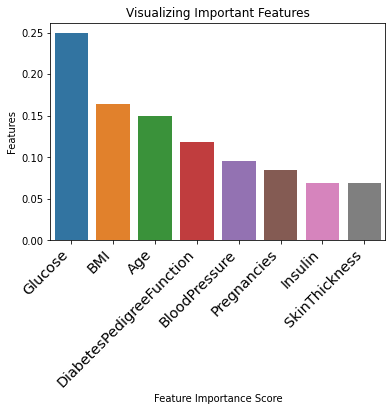

In [18]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

In [19]:
# load data with selected features
X = data.drop(["Outcome", "SkinThickness"], axis=1)
y = data["Outcome"]

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [20]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7532467532467533


### Array Method for different parameters on RandomForest Classifier

In [25]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

#### Grid Search CV

#### It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters 

#### so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

#### GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [28]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_score_

0.7713234305686248

In [30]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30)

In [31]:
rf_best.estimators_[5]

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=5,
                       random_state=336752728)

In [32]:
rf_best.estimators_[4]

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=5,
                       random_state=1139585330)

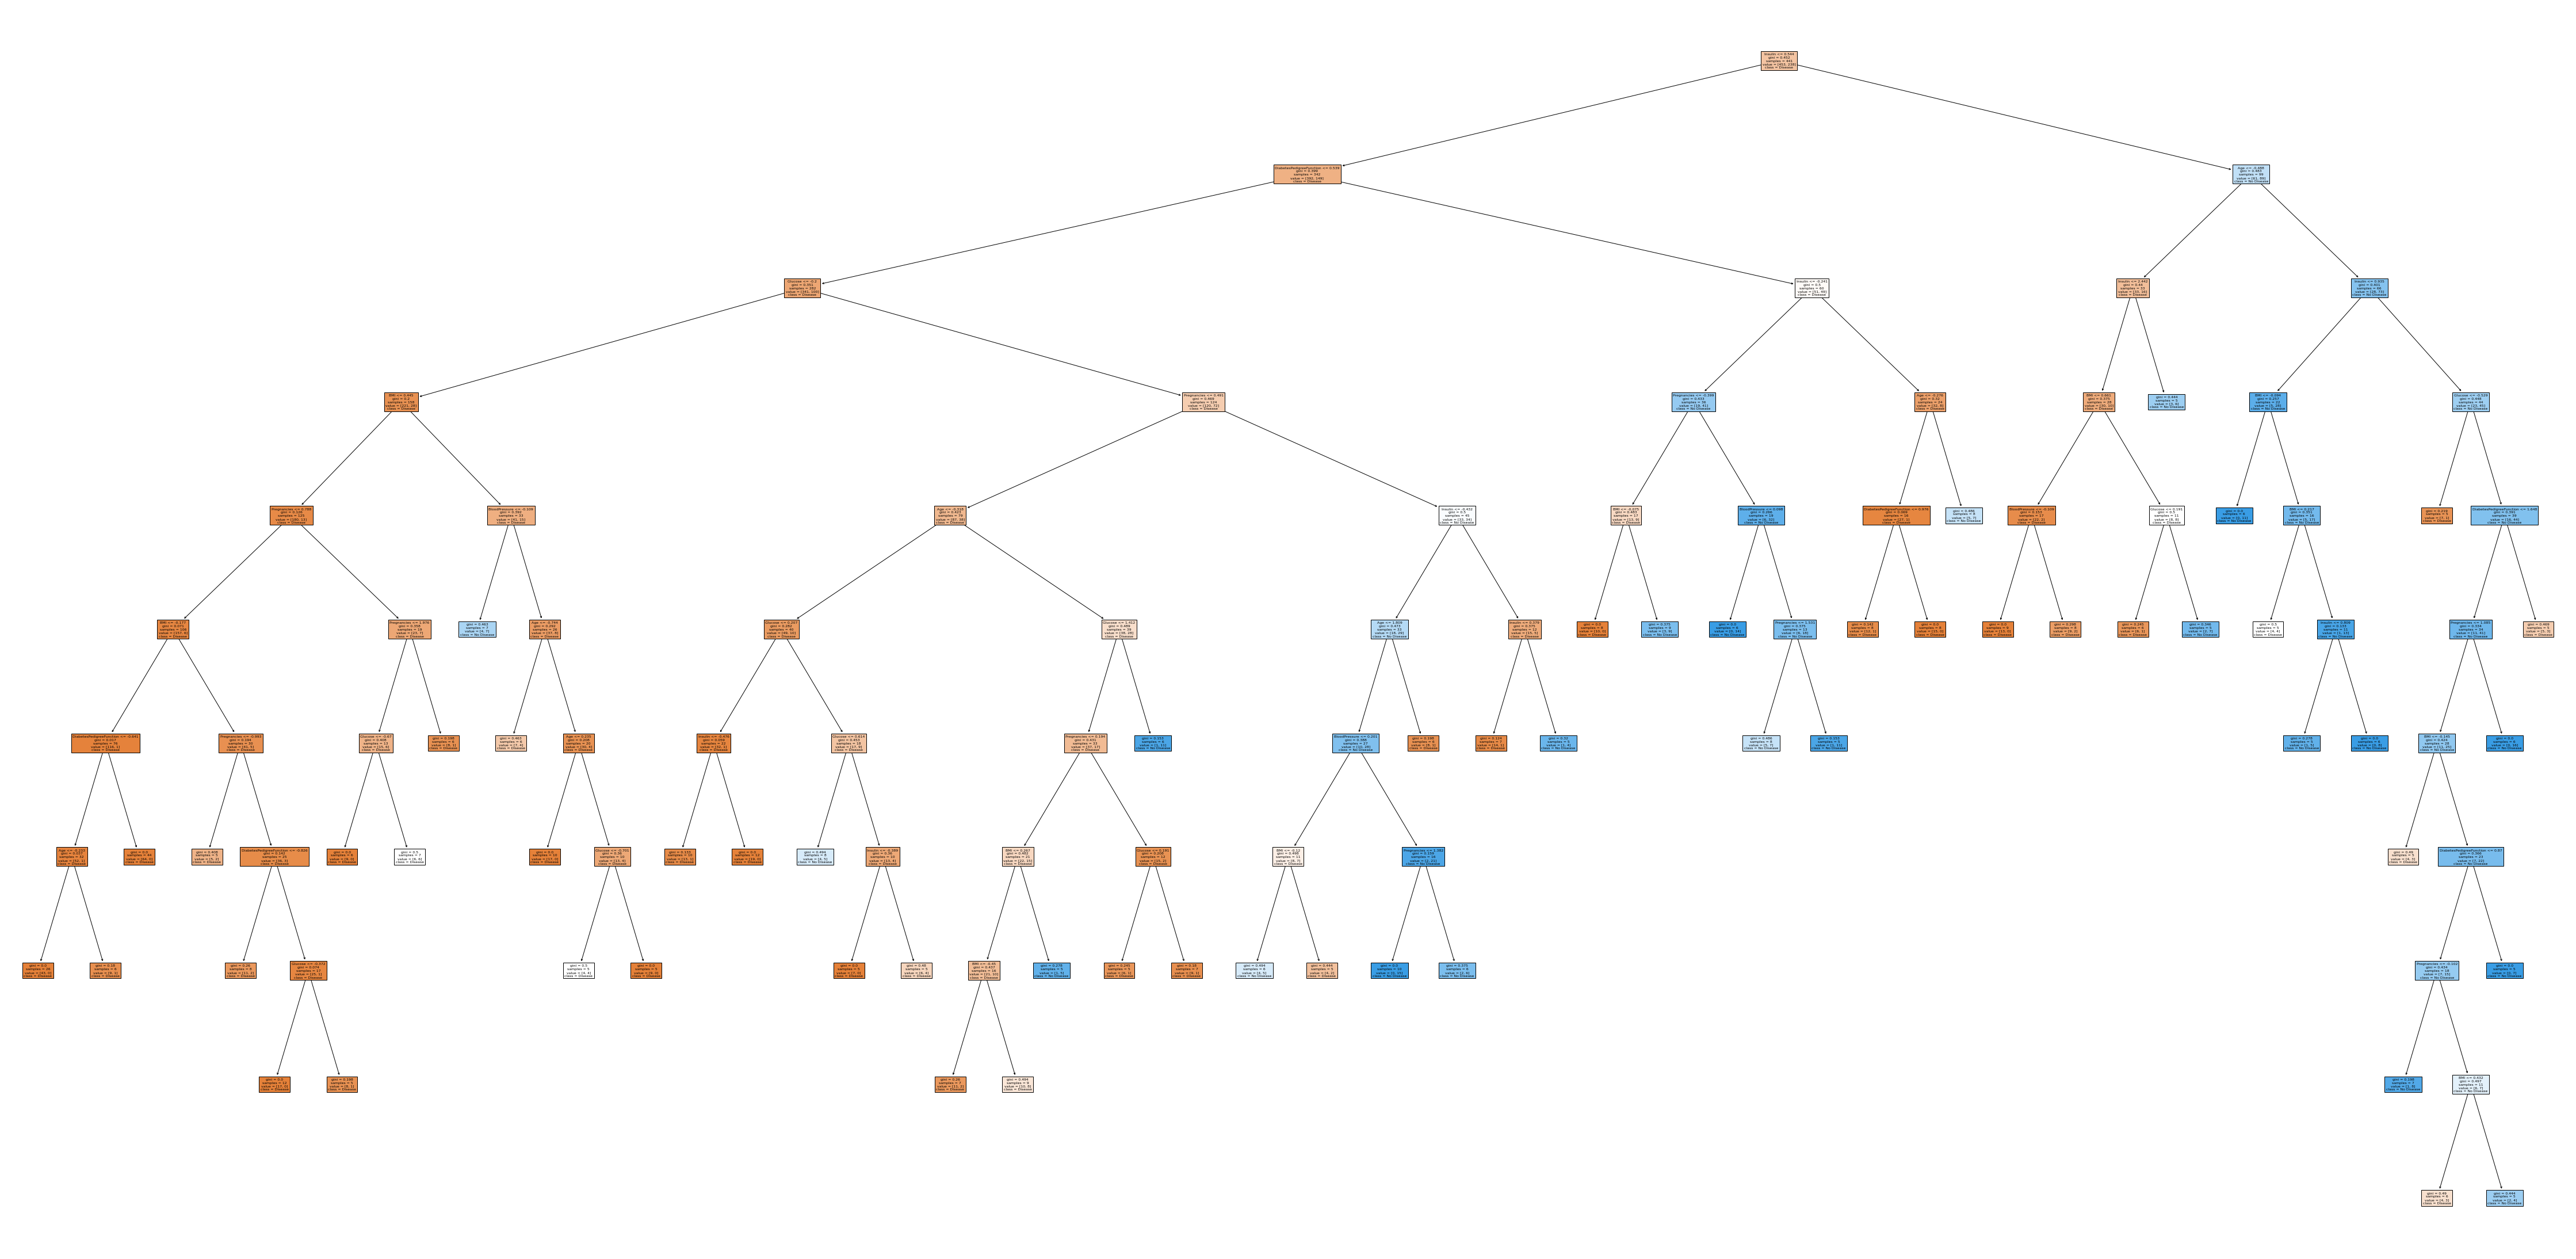

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);
plt.show()